In [1]:
import tensorflow as tf

C:\Users\USER\anaconda3\envs\env_deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\anaconda3\envs\env_deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\anaconda3\envs\env_deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\anaconda3\envs\env_deeplearni

In [2]:
from tensorflow import keras

In [3]:
from keras import preprocessing


Using TensorFlow backend.


In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
train_dataset=ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_dataset=ImageDataGenerator(rescale=1.0/255)

In [24]:
train_gen=train_dataset.flow_from_directory('./cnn-dogs-vs-cats-main/data/training_data/', target_size=(64,64), batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [27]:
val_gen=test_dataset.flow_from_directory('./cnn-dogs-vs-cats-main/data/testing_data/', target_size=(64,64), batch_size=32, class_mode='binary')

Found 400 images belonging to 2 classes.


In [8]:
cnn=tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.summary()
cnn.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
____________________________________________________________

In [31]:
history=cnn.fit(x=train_gen, epochs=5, validation_data=val_gen)


Epoch 1/5
32/32 [==============================] - 8s 265ms/step - loss: 0.4527 - acc: 0.8000 - val_loss: 0.6342 - val_acc: 0.6750
Epoch 2/5
32/32 [==============================] - 8s 252ms/step - loss: 0.4309 - acc: 0.8090 - val_loss: 0.6404 - val_acc: 0.6725
Epoch 3/5
32/32 [==============================] - 7s 216ms/step - loss: 0.4210 - acc: 0.8120 - val_loss: 0.8925 - val_acc: 0.6175
Epoch 4/5
32/32 [==============================] - 8s 239ms/step - loss: 0.4175 - acc: 0.8130 - val_loss: 0.6819 - val_acc: 0.6800
Epoch 5/5
32/32 [==============================] - 7s 227ms/step - loss: 0.4084 - acc: 0.8160 - val_loss: 0.6887 - val_acc: 0.6950


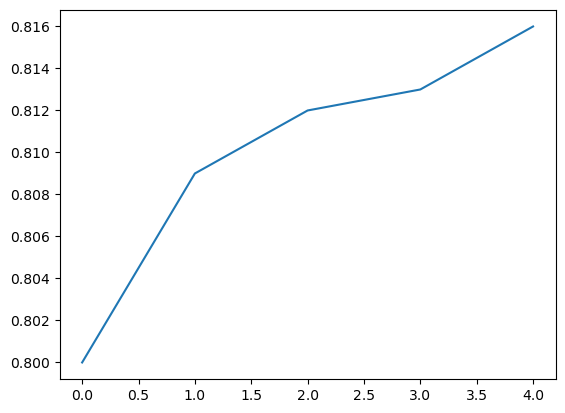

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])

In [40]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img('C:\\Users\\USER\\Downloads\\cnn-dogs-vs-cats-main\\cnn-dogs-vs-cats-main\\data\\testing_data\\cats\\cat.1006.jpg', target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)
result=cnn.predict(test_image)
if result[0][0]==1:
  print('dog')
else:
  print('cat')

cat
